# AIN212 Fall 2023 Project Assignment
Rating prediction on Women's E-Commerce Clothing Reviews dataset.

### Dataset: We will be working on Women's E-Commerce Clothing Reviews dataset from Kaggle.
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

* Authors : Alperen Demirci(2220765010) & Bora Dere(2220765021)

* Course : AIN212 - Data Science

* Emails : alperendemirci@hacettepe.edu.tr & boradere@hacettepe.edu.tr , b2220765010@cs.hacettepe.edu.tr & b2220765021@cs.hacettepe.edu.tr

* Date : 28/12/2023

* Description : This project is about classifying the reviews of the women who bought clothes from an online shopping site. The reviews are rated from 1 to 5, we will classify every entry into 5 bins called very bad,bad,neutral,good,very good. The dataset is explained in the next cell.

## Explaining the dataset:
There are 11 columns in this dataset.
- <span style="color: red;">Clothing ID:</span> Integer Categorical variable that refers to the specific piece being reviewed.
- <span style="color: red;">Age:</span> Positive Integer variable of the reviewers age.
- <span style="color: red;">Title:</span> String variable for the title of the review.
- <span style="color: red;">Review Text:</span> String variable for the review body.
- <span style="color: red;">Rating:</span> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- <span style="color: red;">Recommended IND:</span> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- <span style="color: red;">Positive Feedback Count:</span> Positive Integer documenting the number of other customers who found this review positive.
- <span style="color: red;">Division Name:</span> Categorical name of the product high level division.
- <span style="color: red;">Department Name:</span> Categorical name of the product department name.
- <span style="color: red;">Class Name:</span> Categorical name of the product class name.

## Our approach:

* So first we need to clean the data.(remove the null values, remove the unnecessary columns, etc.)
* Then we need to visualize the data in order to understand it better.
* After that we will use different classification algorithms to predict the ratings of the reviews.(Naive Bayes, Decision Tree, Random Forest, etc.)
* We will compare the results of the algorithms and choose the best one.

## Personal Thoughts and Comments:

* Since our problem and data are near to SpamClassification problem, I think the fastest and most accurate algorithm will be Naive Bayes.
* Hence we are not familiar with deep NLP concepts, we will try to solve this problem using only statistics and essences of data science. In my opinion, this will be challenging but educative for us.
* Since our valuable column is based on strings, cleaning the data will be the most challenging part of this project.

## Imports and loading the dataset

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df = pd.DataFrame(data)

In [194]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Data Preprocessing

First we check the numerical columns' null values.

Then we check the categorical columns' null values.

In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


When checked we do not see anomaly on Age column (i.e. negative values, etc.) so we can continue.
Range column is also fine, it fits into constraints.

* Quick Note : Unnamed column is a poor attempt to create an index column. So, it is redundant.
Also we won't use the Clothing ID column, so we will drop them both.

In [196]:
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns='Clothing ID',inplace=True)

In [197]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [198]:
df.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

As seen we have 3810 null values in Title column. In order to solve this problem, we have concataneated the Title and Review Text columns. Then we have dropped the Review Text column.

* Concatanation format is like this: Title + " " + Review Text

* We did not dropped the null values in Review Text columns since a customer may just write its' review in the Title column.(Like Title = "I love it!" and Review Text = null)

* For divison name, department name and class name columns, we have filled the null values with their mode values.(Mode Imputation)

In [199]:
## Code for title and review concatanation and removing null values
df['Review Text'] = df['Review Text'].fillna('')
df['Title'] = df['Title'].fillna('')
df['Review'] = df['Title'] + ' ' + df['Review Text']
df.drop(columns=['Title','Review Text'],inplace=True)
df.head()
df.shape

(23486, 8)

In [200]:
"""
We won't use this probably. Just in case :)

## Code for removing empty reviews
empty_reviews = df['Review'].apply(lambda x: x.isspace())
df = df[~empty_reviews]
df.shape
"""

"\nWe won't use this probably. Just in case :)\n\n## Code for removing empty reviews\nempty_reviews = df['Review'].apply(lambda x: x.isspace())\ndf = df[~empty_reviews]\ndf.shape\n"

In [201]:
## Code for imputing mode values in place of null values in division, department and class columns

df['Division Name'] = df['Division Name'].fillna(df['Division Name'].mode()[0])
df['Department Name'] = df['Department Name'].fillna(df['Department Name'].mode()[0])
df['Class Name'] = df['Class Name'].fillna(df['Class Name'].mode()[0])

* But hey, what about the null values in Review Text column? We have dropped them after the concatanation due to lack of information. We can not generate fake reviews :)

In [202]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,33,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1,34,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


Lets' check the null values again.

In [203]:
df.isnull().sum()

Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review                     0
dtype: int64

In [204]:
df.shape

(23486, 8)

Since we have 0 null values, we can continue.

## Feature Visualization

We will plot distributions of the data in order to understand it better.

<Figure size 1000x500 with 0 Axes>

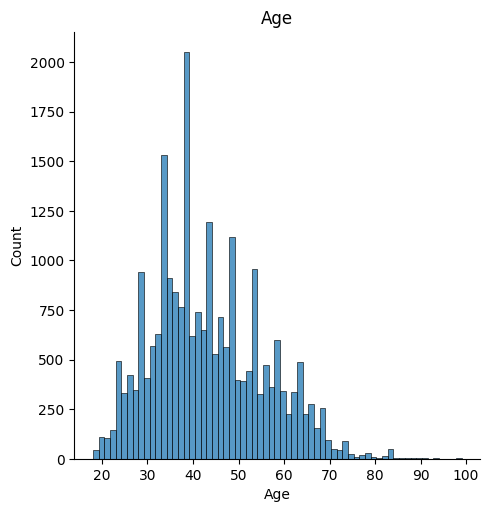

<Figure size 1000x500 with 0 Axes>

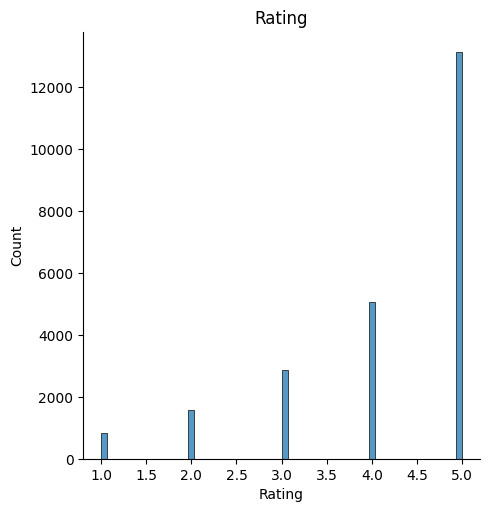

<Figure size 1000x500 with 0 Axes>

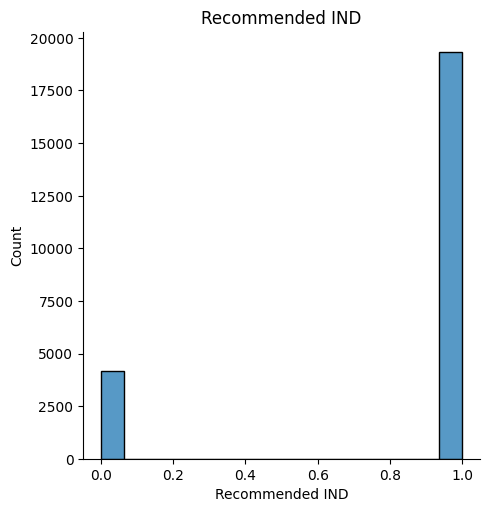

<Figure size 1000x500 with 0 Axes>

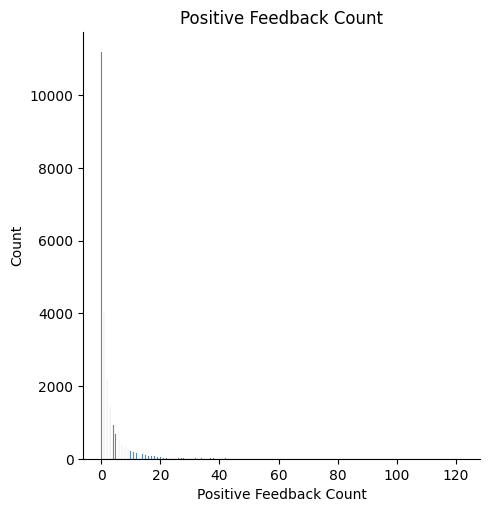

In [205]:
## Plotting the distribution of every numerical column
l_num = []

for i in df.columns:
    if df[i].dtype != 'object':
        l_num.append(i)


for i in l_num:
    plt.figure(figsize=(10,5))
    sns.displot(df[i],kde=False)
    plt.title(i)
    plt.show()

* We see that Age column is noisy but it is similar to normal distribution.That's a good sign for us because we do not need to apply any transformation on it.

There exist some outliers in the Age column but we will not drop them since they are not too far away from the mean.

* We see that Rating column is imbalanced. Now there is a class imbalance problem we need to solve.


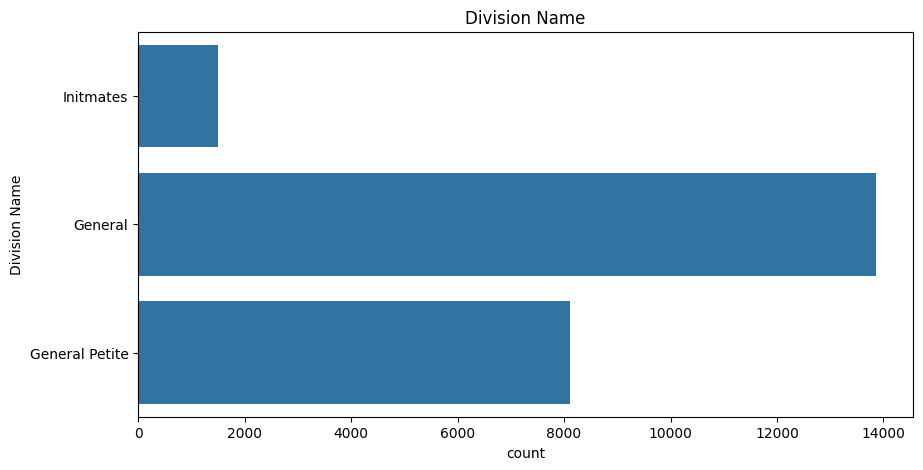

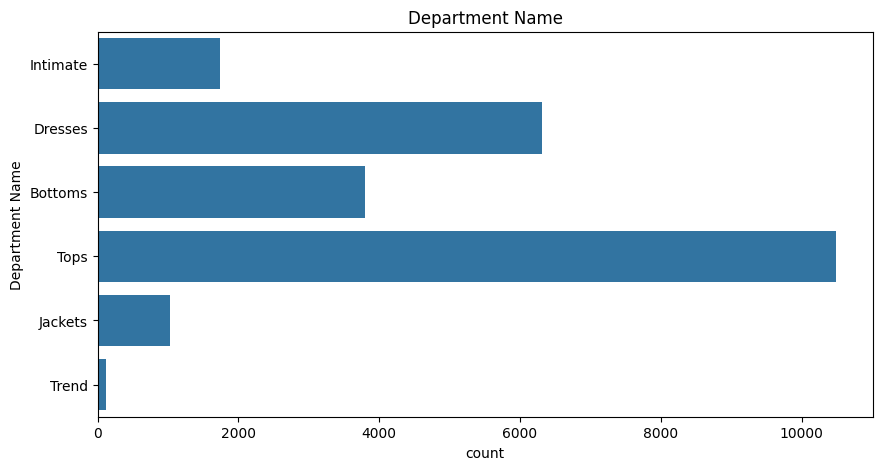

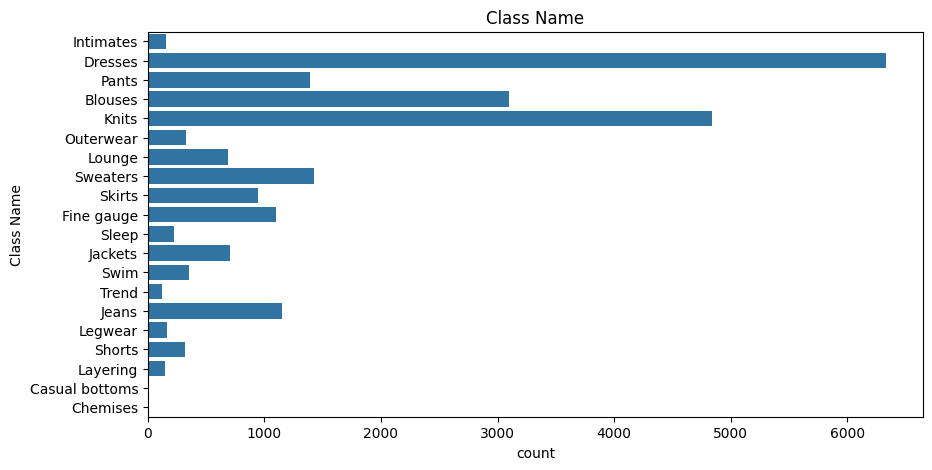

In [210]:
l_cat = []

for i in df.columns:
    if df[i].dtype == 'object':
        if i != "Review":
            l_cat.append(i)

for i in l_cat:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.show()


 There are some rare categories in the Class Name column (Casual bottoms,Chemises).  
Also in the Department Name column (Trend).

* We may drop them since they are not too much, we will decide it later.


## Feature Engineering

* We will check for the unique values of the columns in order to understand the data better.

In [184]:
for col in df.columns:
    print(col,": ",df[col].nunique())

Age :  77
Rating :  5
Recommended IND :  2
Positive Feedback Count :  82
Division Name :  3
Department Name :  6
Class Name :  20
Review :  22638


* Recommended IND column takes only 2 values, so it is a binary column. We will convert it to 0 and 1.

* Since Class Name, Department Name and Division Name columns are categorical, we will use One Hot Encoding for them. One Hot encoding because we do not want to give them any order!

* Rating column is already ordinal, so we will not touch it.

* Review column has 22638 values but we have 23486 rows. It is a really hard possibility to have 848 rows with the same review. By that we can say that there are some reviews that are blank. We will handle them later.

* Other columns do not seem to have any problem.

In [185]:
## Code for One Hot Encoding of division, department and class columns

df = pd.get_dummies(df,columns=['Division Name','Department Name','Class Name','Recommended IND'],drop_first=True)


In [186]:
df.head()

,Age,Rating,Positive Feedback Count,Review,Division Name_General Petite,Division Name_Initmates,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,...,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Recommended IND_1
0,33,4,0,Absolutely wonderful - silky and sexy and com...,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,34,5,4,Love this dress! it's sooo pretty. i happen...,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,60,3,0,Some major design flaws I had such high hopes ...,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,50,5,0,"My favorite buy! I love, love, love this jumps...",True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,47,5,6,Flattering shirt This shirt is very flattering...,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [187]:
df.columns

Index(['Age', 'Rating', 'Positive Feedback Count', 'Review',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Department Name_Dresses', 'Department Name_Intimate',
       'Department Name_Jackets', 'Department Name_Tops',
       'Department Name_Trend', 'Class Name_Casual bottoms',
       'Class Name_Chemises', 'Class Name_Dresses', 'Class Name_Fine gauge',
       'Class Name_Intimates', 'Class Name_Jackets', 'Class Name_Jeans',
       'Class Name_Knits', 'Class Name_Layering', 'Class Name_Legwear',
       'Class Name_Lounge', 'Class Name_Outerwear', 'Class Name_Pants',
       'Class Name_Shorts', 'Class Name_Skirts', 'Class Name_Sleep',
       'Class Name_Sweaters', 'Class Name_Swim', 'Class Name_Trend',
       'Recommended IND_1'],
      dtype='object')

<span style="color: cyan;">Diyorum ki title ile review texti birleştirelim. Format şu şekilde (title): (content) olsun. Bu şekilde boş olanları atmamış hem de null bir column a çözüm getirmiş oluruz. Ayrıca divison ve department name zaten kategorik (biri 3 diğeri 6 unique içeriyo) bu yüzden atmak yerine oneHotEncoding yapalım ayrıca feature sayısı da artar. Evet Naive Bayes çok mantıklı çünkü yaptığımız şey spam classfier'a benziyor bu da Naive Bayes'in iyi olduğu konu hatta aynı metotla yapıyoruz. 
</span>

,0
0,"(0, 2)\t1.0\n (0, 5)\t1.0\n (0, 14)\t1.0"
1,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 12)\t1.0"
2,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 12)\t1.0"
3,"(0, 1)\t1.0\n (0, 3)\t1.0\n (0, 22)\t1.0"
4,"(0, 0)\t1.0\n (0, 7)\t1.0\n (0, 9)\t1.0"
...,...
23481,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 12)\t1.0"
23482,"(0, 1)\t1.0\n (0, 7)\t1.0\n (0, 17)\t1.0"
23483,"(0, 1)\t1.0\n (0, 4)\t1.0\n (0, 12)\t1.0"
23484,"(0, 0)\t1.0\n (0, 4)\t1.0\n (0, 12)\t1.0"


<span style="color: yellow;">kanka division, department name falan gereksiz deyip atabiliriz başta da. burdan sonrası zaten train test split ve prediction falan. gpt abim MultinomialNB ile falan yaparsınız dedi ben yemeğe iniyom bakılır ona</span>